# Titanic Project

# Problem Statement:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I try to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Loading the DataSet and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Above is the training dataset of the titanic survival problem. It has 891 rows (number of passengers), and 12 columns (data about the passenger) including the target variable “Survived”.

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Variable Description

* Passenger ID : It is the unique id given to each passenger from 1-891
* Survived-  0 = No, 1 = Yes 
* Pclas- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
  Variable Notes pclass: A proxy for socio-economic status (SES)
  1st = Upper, 2nd = Middle, 3rd = Lower
* Name : Name of the Passenger
* Sex- Sex of the passengers
* Age- Age in years
  Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp- # of siblings / spouses aboard the Titanic. 
  The dataset defines family relations in this way… 
  Sibling = brother, sister, stepbrother, stepsister.  
  Spouse =husband, wife (mistresses and fiancés were ignored).
* Parch- # of parents / children aboard the Titanic. 
  The dataset defines family relations in this way… 
  Parent = mother, father. 
  Child = daughter, son, stepdaughter, stepson.  
  Some children travelled only with a nanny, therefore parch=0 for them. 
* Ticket- Ticket number
* Fare- Passenger fare
* Cabin- Cabin number
* embarked-
  Port of Embarkation: 
  C = Cherbourg, Q = Queenstown, S = Southampton 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

<AxesSubplot:>

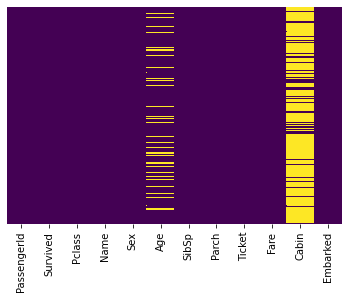

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see from the diagram the column ‘Age’ and ‘Cabin’ have got null values. While ‘Cabin’ has huge amount null values, ‘Age’ has moderate amount of null values. Since Embarked has only 2 missing values its not clearly visible in the heatmap.
Here we would drop the ‘Cabin’ column as it has got mostly NULL values.

In [7]:
#Checking the Survived data

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There are 891 datas and no empty values and missing values present in survived(target) column

# Data Description

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* The description of some features like Passenger ID, can be ignored
* In all the columns we can see count as 891 but Age column has 714 because of Nan Vlues
* We have Mean of the age as 29.69 and Standard Deviation of 14.52, which means most of the people in the data are in the age group of (15 to 43).
* Minimum Age as per description is 0.42 that means Infants with few months old were also aboard.
* 25% of passengers have age less than 20 and 50% of passengers have age less than 28 and 75% of passengers have 38 or lesser age.
* Maximum Age is 80.
* In Fare Column, we can see that Maximum fare is 512.32 and minimum fare is 0. We can find out which rows gives the fares zero as it could be an error in data.
* Titanic charged reduced fares to children under 12, and a further reduced fare to infants less than 1 year old. So we cant exactly calculate the fare on each passenger wise. Some purchased the ticket for group as a family and so Fare is 0 for others and only purchased passenger data reflects the Fare.

In [9]:
df.loc[df['Fare'] == 0.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


* There are a handful of 1st class passengers who had a Fare of 0.
* Joseph Ismay's was the chairman of the company that owned the Titanic. William Harrison was his private secretary, and got a free ride.
* Similarly, Thomas Andrews was the naval architect in charge of the plans for the ocean liner Titanic.
* Titanic charged reduced fares to children under 12, and a further reduced fare to infants less than 1 year old. So we cant exactly calculate the fare on each passenger wise. Some purchased the ticket for group as a family and so Fare is 0 for others and only purchased passenger data reflects the Fare. 
* Since the data contain only 891 passengers out of 2224 passengers, we couldnt identify if thier Family members or Friends have purchased tickets for them. 

# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

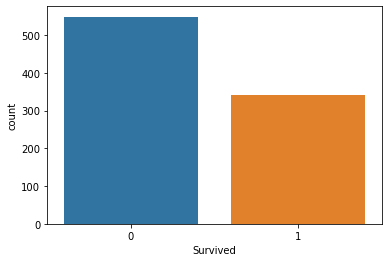

In [10]:
#1. Survived Feature

sns.countplot(df["Survived"],data = df)

* We can see that number of "No" is more than 500 as we have seen from the data description of Survived above.
* Number of Survived passengers are around 350.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

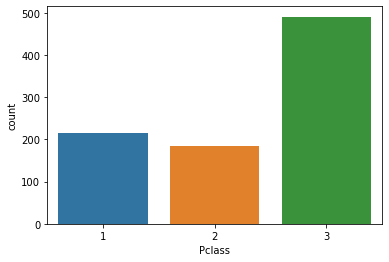

In [11]:
#2. Pclass Feature

sns.countplot(df["Pclass"],data = df)

* We can see that, out of the available data, !st class passengers are around 215, 2nd class below 200.
* Most of the passengers in the Dataset is from 3rd class- around 490.

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

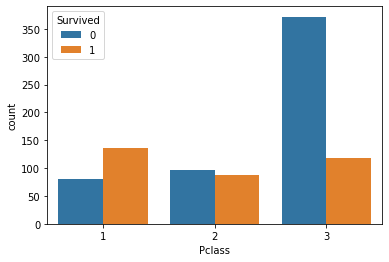

In [13]:
sns.countplot(df["Pclass"],hue=df["Survived"],data = df)

Here, we can clearly see that Money matters.
* The first class passengers have higher survival rate than second or third class.
* More than 60% of 3rd class passengers did not survive.
* Almost equal number of people in 2nd Class have survived and died.
* Passengers in 1st Class, Out of a large number survived and some of the passengers died.
* in Conclusion, Passengers in Higher Class have more chance to survive and passengers in Lower classes have higher chance of death.

<AxesSubplot:xlabel='Sex', ylabel='count'>

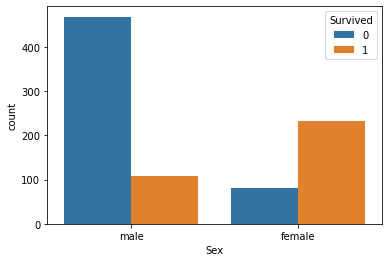

In [14]:
#3. Sex Feature

sns.countplot(df["Sex"],hue=df["Survived"],data = df)

* Comparing to males, Females have more chance to survive.
* Because of Women and children comes first policy, Women were given priorities to get off the ship when it started to sink.

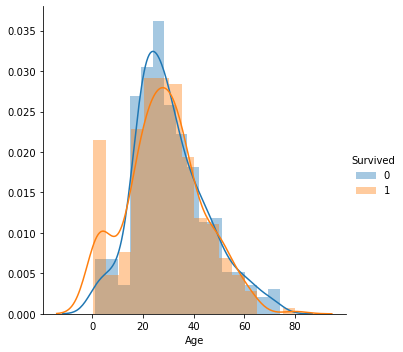

In [15]:
#4. Age Feature

sns.FacetGrid(df, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

* Passengers below age 20 years have higher chances of Survival.
* Out of the Passengers between the age of 20 and 45, more number have died than survived.
* Almost all passengers greater than 65 years have died. This could be because more chances were given to young people than aged passengers or they couldnt survive the cold water.

<AxesSubplot:xlabel='Age', ylabel='Density'>

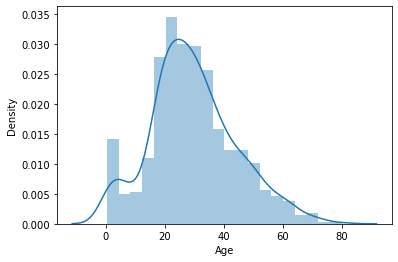

In [16]:
#Since Age is numeric feature, we can find the distribution of the Data

sns.distplot(df['Age'])

Age is almost normally distributed

<AxesSubplot:xlabel='SibSp', ylabel='count'>

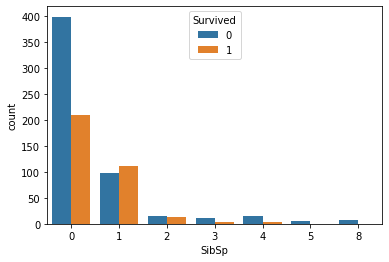

In [17]:
#5-Sibsp Feature

sns.countplot(df["SibSp"],hue=df["Survived"],data = df)

* Out of the 0 Siblings Passengers, most of them died.
* Passengers with 1 sibling have almost equal chances of survival and death.
* Passengers with more number of siblings have a lower chance of survival.
* For passengers with siblings 5 or more did not survive any.

We can conclude that higher the siblings, higher the chance of Death.

<AxesSubplot:xlabel='Parch', ylabel='count'>

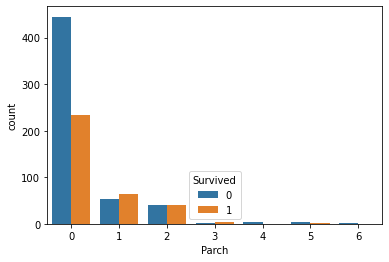

In [18]:
#6. Parch Feauture

sns.countplot(df["Parch"],hue=df["Survived"],data = df)

* Same as SibSp, 0 Parch most of them died.
* More passengers have survived when Parch is 1
* Equal number of survival and death when parch is 2.
* More survival than death when Parch is 3.
* No one survived when Parch is 4 and 6
* Few survived and more died at Parch 5.

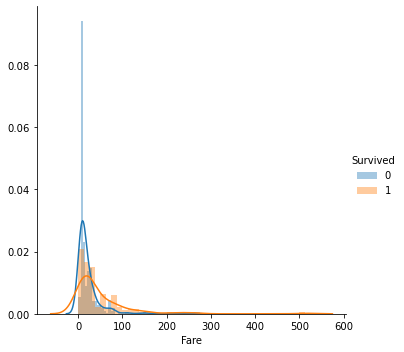

In [19]:
#7. Fare Feauture

sns.FacetGrid(df, hue="Survived", size=5) \
 .map(sns.distplot, "Fare") \
 .add_legend();
plt.show();

Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive. This observation is the same as pclass persons who were rich have a higher chance to survive and poor lower chance to survive.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

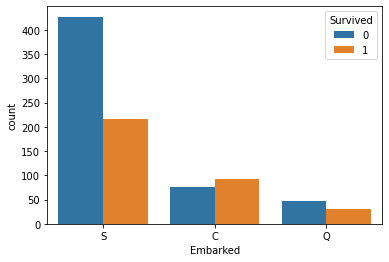

In [20]:
#8. Embarked Feature

sns.countplot(df["Embarked"],hue=df["Survived"],data = df)

* More number of Passengers have been embarked from S-Southampton, most of them died.
* A little more Passengers embarked from Cherbourg have survived than died.

# Bivariate Analysis

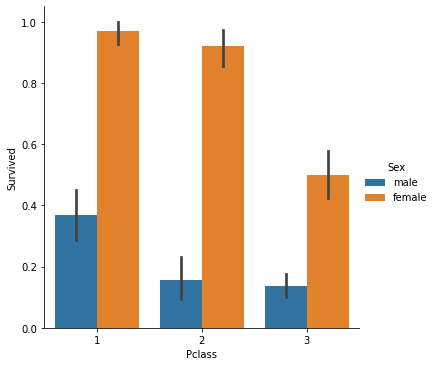

In [21]:
# Comparison between Pclass and Sex
g=sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')

plt.show()

* Here, I can see that most number of females in First and Second class have survived.
* In 3rd class, more females than males have survival chance.
* If you are rich and a female, chance of Survival are the highest.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

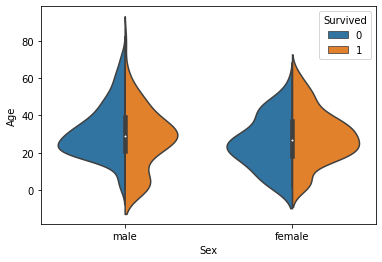

In [22]:
#Comparison between Age and Sex on Survived

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

* Good for children.
* High for women in the age range 20-50.
* Less for men as the age increases.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

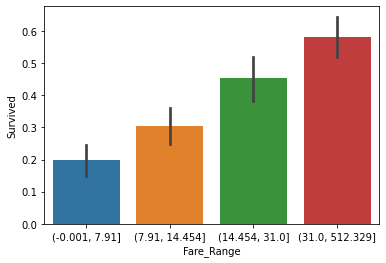

In [23]:
#Comparison between Fare and Survived

df['Fare_Range'] = pd.qcut(df['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

Higher the Fare, Higher the chance of Survival.

In [24]:
df.drop(['Fare_Range'],axis=1,inplace=True)

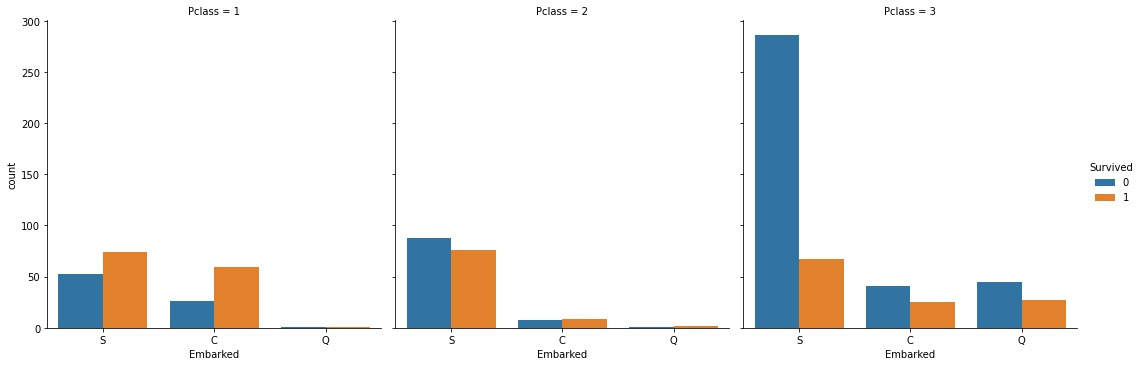

In [25]:
# Comparison between Embarked and Pclass on Survived

sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

Some notable observations are: 

* Majority of the passengers boarded from S-Southampton. So, the missing values can be filled with S.
* Majority of class 3 passengers boarded from Q-Queenstown.
* Compared to class 3, Passengers from Southampton have more survival rate in Pclass 1 and 2.

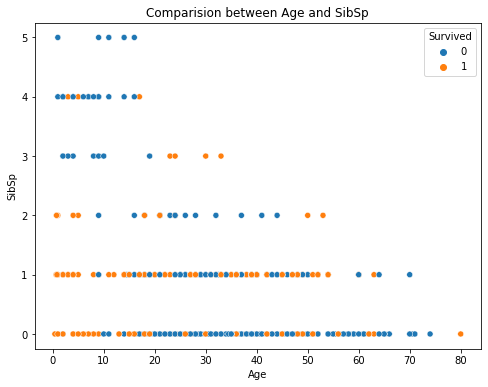

In [26]:
#Comparision between Age and Sibsp using scatter plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Age and SibSp')
sns.scatterplot(df['Age'],df['SibSp'],hue=df["Survived"]);

* As i have seen earlier in univariate analysis, survival of sibsp with more than 4 is zero.
* Chances of survival are higher if age is less than 20 and sibsp of 0.
* Chances of Survival are higher at age 0 to 55 if sibsp is 1.

<AxesSubplot:title={'center':'Comparision between Parch and Fare'}, xlabel='Parch', ylabel='Fare'>

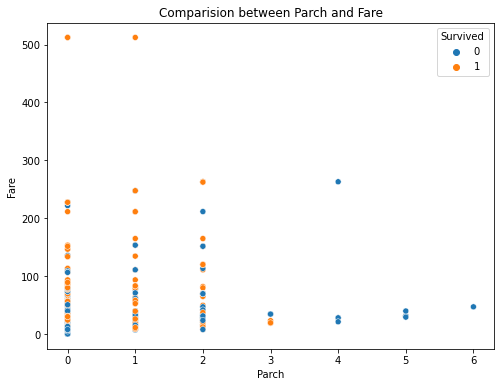

In [27]:
#Comparison between Parch and Fare on Survived 

plt.figure(figsize=[8,6])
plt.title('Comparision between Parch and Fare')
sns.scatterplot(df['Parch'],df['Fare'],hue=df["Survived"])

* Chances of survival are higher when parch is 0 or 1 and fare is higher.
* Passangers of Parch 4 and above did not survive at all.

<AxesSubplot:title={'center':'Comparision between Parch and Age'}, xlabel='Parch', ylabel='Age'>

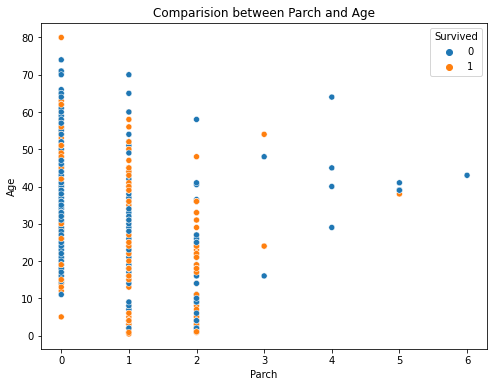

In [28]:
#Comparison between Parch and Age on Survived 

plt.figure(figsize=[8,6])
plt.title('Comparision between Parch and Age')
sns.scatterplot(df['Parch'],df['Age'],hue=df["Survived"])

* Mixed number of deaths and survived when parch is 0
* More chances of Survival at Parch 1 and 2 and Age between 0 to 55
* As parch increases, survival rate decreases.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

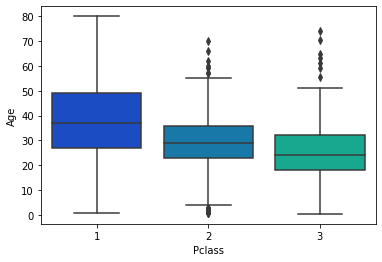

In [29]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

From this graph we can find out the mean age for each of the Pclass. We would impute the same for missing ‘Age’ values. We can write a simple python function to get the same.
* For class 1, Mean of Age is 38
* for class 2, Mean is 29
* and for class 3, Mean is 24

# Multivariate Analysis

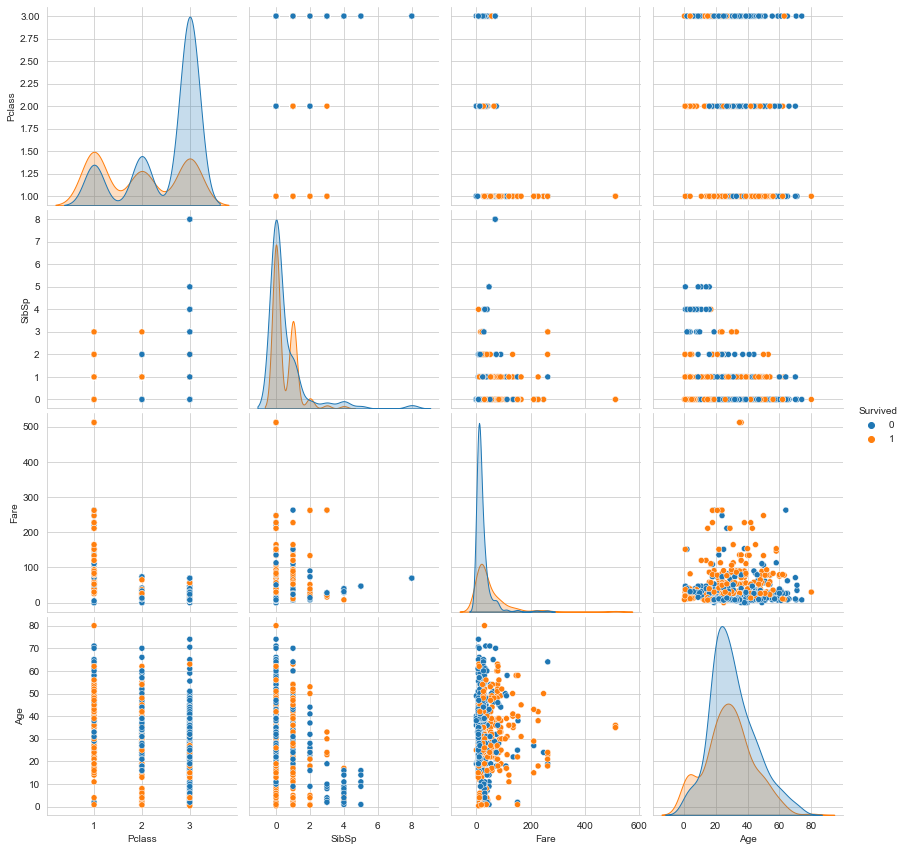

In [30]:
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","SibSp","Fare","Age"]], hue="Survived", size=3);
plt.show()

* we can see that passengers who paid higher fares or traveling in the upper class have a higher chance to survive.
* Age is also giving some info like young persons have a higher chance to survive than old peoples.
* In all the features, we can see death rate is more than survival rate.

# Data Cleaning and Feature Engineering

# 1-Treating the Missing Data

In [31]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [32]:
#Embarked has only 2 missing values and we can fill it with mode

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [33]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
#As the column ‘Cabin’ had a lot of missing data. I decided to categorize all the missing data as a different class.
#I named it NA. I assigned all the missing values with this value.

df.Cabin = df.Cabin.fillna('NA')

In [35]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
#Age is a numerical data, so we can use mean or median, for beter view of data i am using Median.

df["Age"]=df["Age"].fillna(df["Age"].median())

In [37]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no null values now

# 2-Encoding the Categorical Data

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Name','Sex','Ticket','Cabin','Embarked']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,146,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,146,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [41]:
#Checking unique values in each column

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [42]:
#values from 0 to 8 except 6 and 7 for SibSp

df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [43]:
#Values from 0 to 6 for Parch

df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

# 3- Identifying and Removing Outliers

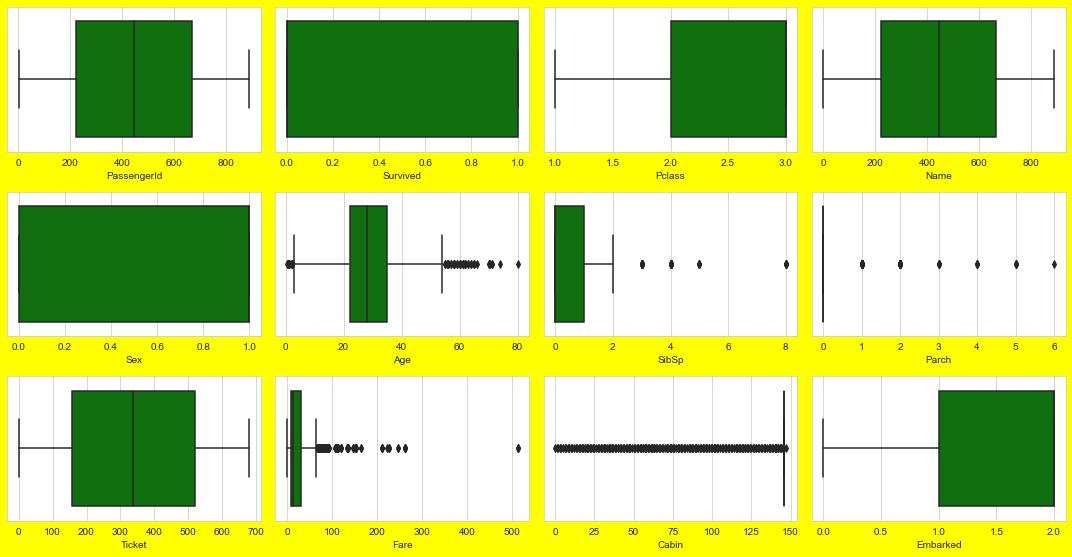

In [44]:
plt.figure(figsize=(15,10),facecolor='yellow')
graph=1 

for column in df:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='v')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

Features:
* Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
  Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
* Binary: A subtype of categorical features, where the variable has only two categories. 
  Eg: Sex (Male/Female)
* Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
  Eg. Pclass (1, 2, 3)
* Continuous: They can take up any value between the minimum and maximum values in a column. 
  Eg. Age, Fare
* Count: They represent the count of a variable. 
  Eg. SibSp, Parch
* No Use: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might     fall into this category.

* Continuous Data is present only in Age and Fare. So we can remove outliers of those groups only and ignore the others. 

# Zscore method

In [45]:
dfCont_Cols = df[["Age", "Fare"]]

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(dfCont_Cols))
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,146,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,146,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [47]:
# finding the loss percentage

dfloss=(((891-864)/891)*100)
dfloss

3.0303030303030303

Since the data loss percentage is just 3.03% we can continue with this model

In [48]:
df_new.shape

(864, 12)

# 4-Skewness

In [49]:
df_new.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.708375
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          3.751753
Parch          2.840412
Ticket         0.012485
Fare           2.257178
Cabin         -2.401124
Embarked      -1.328443
dtype: float64

Skewness is present in the following when threshold is taken as +/-0.50
* Pclass
* Sex
* SibSP
* Parch
* Fare
* Cabin
* Embarked


In [50]:
#Removing the Skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
cols=['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked']
df_new[cols] = scaler.fit_transform(df_new[cols].values)

In [51]:
df_new.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.480433
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          0.805038
Parch          1.277888
Ticket         0.012485
Fare          -0.009095
Cabin         -1.728778
Embarked      -1.109262
dtype: float64

The skewness is removed upto a limit

# Correlation

In [52]:
df_new.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.014399,-0.029821,-0.043518,0.047309,0.026087,-0.053324,0.009120,-0.064635,-0.017867,-0.024157,0.016490
Survived,-0.014399,1.000000,-0.334725,-0.053716,-0.534012,-0.058724,0.103005,0.141854,-0.175168,0.322012,-0.292538,-0.153775
Pclass,-0.029821,-0.334725,1.000000,0.039166,0.129101,-0.335783,-0.060038,-0.001549,0.359153,-0.601053,0.679183,0.054069
Name,-0.043518,-0.053716,0.039166,1.000000,0.020680,0.073091,-0.091281,-0.045219,0.058393,-0.039313,0.028168,-0.015137
Sex,0.047309,-0.534012,0.129101,0.020680,1.000000,0.065600,-0.198531,-0.249661,0.061305,-0.262301,0.117309,0.114884
Age,0.026087,-0.058724,-0.335783,0.073091,0.065600,1.000000,-0.157487,-0.270779,-0.097952,0.110097,-0.268519,-0.000692
SibSp,-0.053324,0.103005,-0.060038,-0.091281,-0.198531,-0.157487,1.000000,0.436627,0.012016,0.432721,-0.046600,-0.004257
Parch,0.009120,0.141854,-0.001549,-0.045219,-0.249661,-0.270779,0.436627,1.000000,0.003003,0.354063,-0.008030,0.029787
Ticket,-0.064635,-0.175168,0.359153,0.058393,0.061305,-0.097952,0.012016,0.003003,1.000000,-0.153268,0.277254,0.022412
Fare,-0.017867,0.322012,-0.601053,-0.039313,-0.262301,0.110097,0.432721,0.354063,-0.153268,1.000000,-0.537076,-0.117631


<AxesSubplot:>

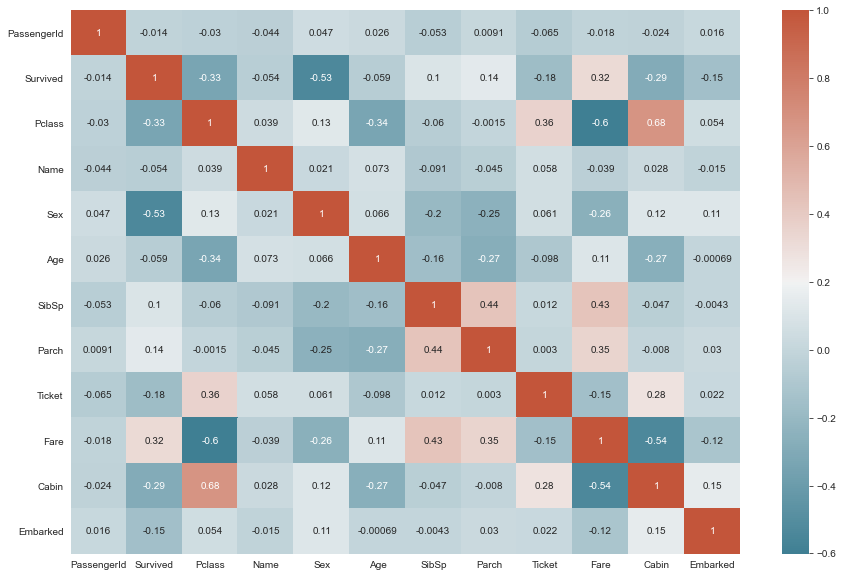

In [53]:
corr = df_new.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From the output, we know that: 
* The most correlated columns are Pclass and Cabin, with a Pearson correlation 0.68.
* The second most correlated columns are Parch and SibSp, with a Pearson correlation 0.44.
* Ticket and Pclass are somewhat correlated to each other with 0.32.

* Our target variable Survived has highest positive corelation with Fare with a correlation of 0.32
* Survived column is negatively correlated with Sex and Pclass with a Pearson correlation of -0.53 and -0.33 respectively as we have seen in bivariate analysis. 

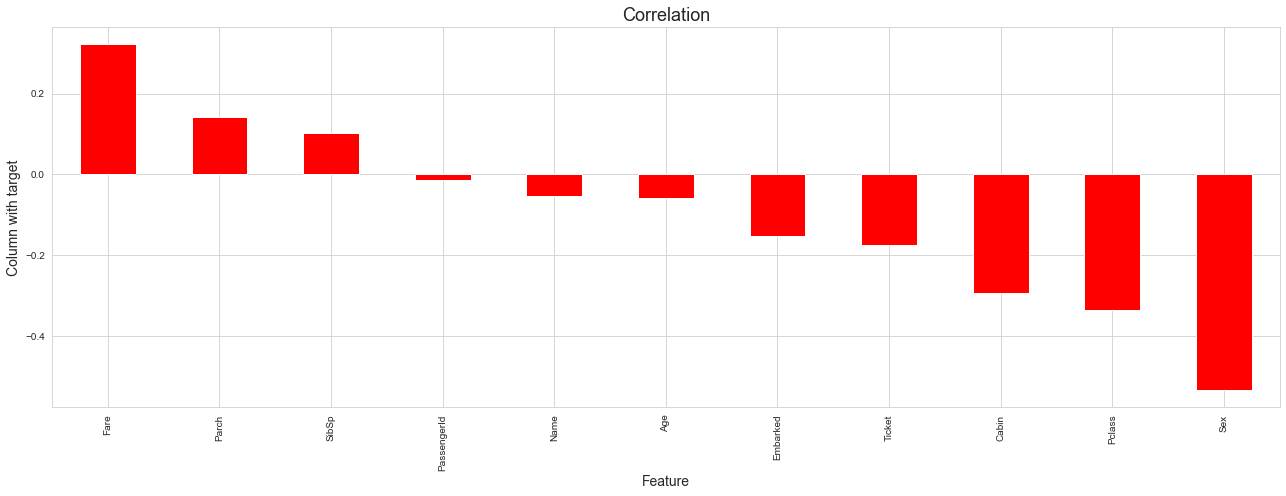

In [54]:
plt.figure(figsize=(22,7))
df_new.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

Highest Correlation of Survived is with Fare followed by Parch.

Sex is also highly negatively correlated followed by Pclass and Cabin.

PassengerID is the least correlated among all.

In [55]:
#Dropping the No Use features in the Dataset
df_new = df_new.drop(["PassengerId"],axis=1)

In [56]:
df_new = df_new.drop(["Name"],axis=1)

In [57]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.842705,0.733053,22.0,1.374574,-0.548637,523,-0.882769,0.479825,0.597626
1,1,-1.501903,-1.364158,38.0,1.374574,-0.548637,596,1.529038,-2.217508,-1.816819
2,1,0.842705,-1.364158,26.0,-0.680931,-0.548637,669,-0.792444,0.479825,0.597626
3,1,-1.501903,-1.364158,35.0,1.374574,-0.548637,49,1.216581,-2.366021,0.597626
4,0,0.842705,0.733053,35.0,-0.680931,-0.548637,472,-0.776493,0.479825,0.597626
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.676050,0.733053,27.0,-0.680931,-0.548637,101,-0.279691,0.479825,0.597626
887,1,-1.501903,-1.364158,19.0,-0.680931,-0.548637,14,0.607981,-2.393016,0.597626
888,0,0.842705,-1.364158,28.0,1.374574,1.879004,675,0.345275,0.479825,0.597626
889,1,-1.501903,0.733053,26.0,-0.680931,-0.548637,8,0.607981,-2.351551,-1.816819


# Data Preprocessing

In [58]:
#Assigning values of Independant variables to x and Dependant variable or target to y

x = df_new.drop("Survived",axis=1)
y = df_new["Survived"]

In [59]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.842705,0.733053,22.0,1.374574,-0.548637,523,-0.882769,0.479825,0.597626
1,-1.501903,-1.364158,38.0,1.374574,-0.548637,596,1.529038,-2.217508,-1.816819
2,0.842705,-1.364158,26.0,-0.680931,-0.548637,669,-0.792444,0.479825,0.597626
3,-1.501903,-1.364158,35.0,1.374574,-0.548637,49,1.216581,-2.366021,0.597626
4,0.842705,0.733053,35.0,-0.680931,-0.548637,472,-0.776493,0.479825,0.597626
...,...,...,...,...,...,...,...,...,...
886,-0.676050,0.733053,27.0,-0.680931,-0.548637,101,-0.279691,0.479825,0.597626
887,-1.501903,-1.364158,19.0,-0.680931,-0.548637,14,0.607981,-2.393016,0.597626
888,0.842705,-1.364158,28.0,1.374574,1.879004,675,0.345275,0.479825,0.597626
889,-1.501903,0.733053,26.0,-0.680931,-0.548637,8,0.607981,-2.351551,-1.816819


In [60]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 864, dtype: int64

In [61]:
y.unique()

array([0, 1])

# Scaling the Data

In [62]:
#since the data is not scaled and have different values, we are using minmaxscaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x),columns=x.columns)

In [63]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.000000,1.0,0.329064,0.83479,0.000000,0.769118,0.432617,0.968156,1.00000
1,0.000000,0.0,0.573041,0.83479,0.000000,0.876471,0.848336,0.059686,0.00000
2,1.000000,0.0,0.390058,0.00000,0.000000,0.983824,0.448186,0.968156,1.00000
3,0.000000,0.0,0.527295,0.83479,0.000000,0.072059,0.794478,0.009667,1.00000
4,1.000000,1.0,0.527295,0.00000,0.000000,0.694118,0.450936,0.968156,1.00000
...,...,...,...,...,...,...,...,...,...
859,0.352235,1.0,0.405306,0.00000,0.000000,0.148529,0.536569,0.968156,1.00000
860,0.000000,0.0,0.283318,0.00000,0.000000,0.020588,0.689575,0.000575,1.00000
861,1.000000,0.0,0.420555,0.83479,0.990972,0.992647,0.644293,0.968156,1.00000
862,0.000000,1.0,0.390058,0.00000,0.000000,0.011765,0.689575,0.014540,0.00000


In [64]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

# SMOTE Analysis

In [65]:
#since the target is not balanced we can use SMOTE Analysis

from imblearn.over_sampling import SMOTE
s=SMOTE()
x, y=s.fit_resample(x, y)

In [66]:
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

# Modeling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Finding Best Random state

In [68]:
Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.848297213622291  on Random_state  28


In [69]:
Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8328173374613003  on Random_state  39


In [70]:
Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8885448916408669  on Random_state  137


In [71]:
Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8421052631578947  on Random_state  87


In [72]:
Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8544891640866873  on Random_state  117


* for DTC- Best accuracy is  0.8359133126934984  on Random_state  90
* for svc- Best accuracy is  0.8390092879256966  on Random_state  66
* for rf- Best accuracy is  0.8885448916408669  on Random_state  56
* for lr- Best accuracy is  0.8328173374613003  on Random_state  84
* for knn- Best accuracy is  0.8513931888544891  on Random_state  197

# Hyperparameter Tuning of 5 Machine Learning Classifiers

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 30}
0.8286850684633776


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=66)

sv=SVC()
sv_grid_param={"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 300, 'gamma': 1, 'kernel': 'rbf'}
0.835227124538144


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=56)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
0.8538535101064987


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=84)

lr=LogisticRegression()
lr_grid_param={"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 100.0, 'penalty': 'l2'}
0.7821299717452728


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=197)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
0.8333579656596392


# Cross Validating

In [78]:
score=cross_val_score(dtc,x,y,cv=5)
score1=score.mean()
print("Cross_Val_Score of DTC:",score1)

Cross_Val_Score of DTC: 0.8091545316235601


In [79]:
score=cross_val_score(sv,x,y,cv=5)
score2=score.mean()
print("Cross_Val_Score of SVC:",score2)

Cross_Val_Score of SVC: 0.795179308845903


In [80]:
score=cross_val_score(rf,x,y,cv=5)
score3=score.mean()
print("Cross_Val_Score of RandomForestClassifier:",score3)

Cross_Val_Score of RandomForestClassifier: 0.8538535101064987


In [81]:
score=cross_val_score(lr,x,y,cv=5)
score4=score.mean()
print("Cross_Val_Score of LogisticRegression:",score4)

Cross_Val_Score of LogisticRegression: 0.7756226907194088


In [82]:
score=cross_val_score(knn,x,y,cv=5)
score5=score.mean()
print("Cross_Val_Score of Knn:",score5)

Cross_Val_Score of Knn: 0.8035861769180613


Text(0.5, 1.0, 'Cross Validation Scores')

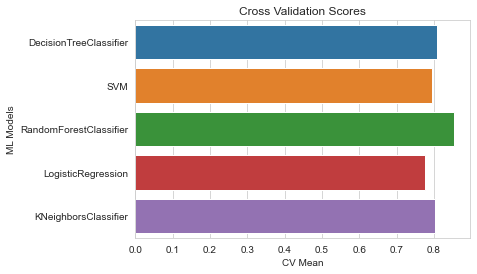

In [83]:
cv_result=[score1,score2,score3,score4,score5]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

# The accuracy score of Random Forest Classifier model(0.85) and Cross validation score(0.85) of RF are matching accurately. Hence I am taking Rf as my final Model.

In [84]:
#{''bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Final_model=RandomForestClassifier(bootstrap= 'False', criterion='gini', max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

85.13931888544892


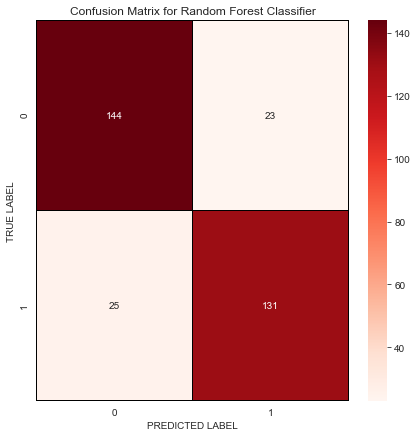

In [85]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# AUC-ROC Curve

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]

In [88]:
y_pred_prob

array([0.16701528, 0.78389012, 0.19369803, 0.82596681, 0.21524078,
       0.12526899, 0.27007075, 0.16610649, 0.60498422, 0.86545313,
       0.10043026, 0.24664296, 0.70032304, 0.01537128, 0.90641312,
       0.2009879 , 0.12228261, 0.52325125, 0.94951241, 0.78727383,
       0.7328995 , 0.75302115, 0.14573105, 0.12422968, 0.10625311,
       0.18654898, 0.60728409, 0.63782314, 0.81925289, 0.70075223,
       0.61589785, 0.11123647, 0.14977031, 0.27400072, 0.33413218,
       0.831794  , 0.25221243, 0.07476653, 0.25471774, 0.09991187,
       0.68544495, 0.86989265, 0.23104498, 0.4366545 , 0.09405224,
       0.79990136, 0.40251282, 0.48325611, 0.90779079, 0.1677595 ,
       0.60854203, 0.20039828, 0.33706754, 0.67465481, 0.45252547,
       0.2109229 , 0.61882592, 0.23082352, 0.28504934, 0.82976714,
       0.30830362, 0.87266872, 0.2484084 , 0.59486388, 0.92283597,
       0.17502948, 0.10648402, 0.80587647, 0.94194078, 0.63203518,
       0.68345876, 0.71116299, 0.55208421, 0.94954595, 0.29025

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [90]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00598802, 0.00598802, 0.01197605, 0.01197605, 0.01796407,
       0.01796407, 0.0239521 , 0.0239521 , 0.02994012, 0.02994012,
       0.04191617, 0.04191617, 0.05389222, 0.05389222, 0.05988024,
       0.05988024, 0.06586826, 0.06586826, 0.08383234, 0.08383234,
       0.08982036, 0.08982036, 0.09580838, 0.09580838, 0.10179641,
       0.10179641, 0.10778443, 0.10778443, 0.13173653, 0.13173653,
       0.13772455, 0.13772455, 0.14371257, 0.14371257, 0.17964072,
       0.17964072, 0.18562874, 0.18562874, 0.21556886, 0.21556886,
       0.23353293, 0.23353293, 0.24550898, 0.24550898, 0.25748503,
       0.25748503, 0.26347305, 0.26347305, 0.32335329, 0.32335329,
       0.35329341, 0.35329341, 0.35928144, 0.35928144, 0.37125749,
       0.37125749, 0.40718563, 0.4251497 , 0.45508982, 0.45508982,
       0.46706587, 0.46706587, 0.48502994, 0.48502994, 0.53293413,
       0.54491018, 0.56886228, 0.56886228, 0.5748503 , 0.57485

In [91]:
tpr

array([0.        , 0.00641026, 0.04487179, 0.05769231, 0.07051282,
       0.07051282, 0.53205128, 0.53205128, 0.55769231, 0.55769231,
       0.58974359, 0.58974359, 0.6474359 , 0.6474359 , 0.67948718,
       0.67948718, 0.70512821, 0.70512821, 0.71153846, 0.71153846,
       0.73717949, 0.73717949, 0.74358974, 0.74358974, 0.75641026,
       0.75641026, 0.78205128, 0.78205128, 0.80128205, 0.80128205,
       0.80769231, 0.80769231, 0.81410256, 0.81410256, 0.83333333,
       0.83333333, 0.83974359, 0.83974359, 0.84615385, 0.84615385,
       0.8525641 , 0.8525641 , 0.85897436, 0.85897436, 0.90384615,
       0.90384615, 0.91025641, 0.91025641, 0.91666667, 0.91666667,
       0.92307692, 0.92307692, 0.92948718, 0.92948718, 0.93589744,
       0.93589744, 0.94230769, 0.94230769, 0.94871795, 0.94871795,
       0.95512821, 0.95512821, 0.95512821, 0.95512821, 0.96153846,
       0.96153846, 0.96794872, 0.96794872, 0.97435897, 0.97435897,
       0.97435897, 0.97435897, 0.98076923, 0.98076923, 0.98717

In [92]:
thresholds

array([1.96418922, 0.96418922, 0.95055983, 0.94954595, 0.94194078,
       0.94041471, 0.75302115, 0.75166911, 0.72864644, 0.72811939,
       0.71116299, 0.70075223, 0.68345876, 0.67818017, 0.65439555,
       0.64719331, 0.63203518, 0.62739338, 0.62609256, 0.62462289,
       0.61432951, 0.60854203, 0.60728409, 0.60043878, 0.59486388,
       0.59193486, 0.58290374, 0.58108487, 0.57802203, 0.57668397,
       0.57622707, 0.56874337, 0.56395878, 0.54911397, 0.5312433 ,
       0.52325125, 0.52249964, 0.49282411, 0.48325611, 0.45252547,
       0.45250826, 0.45141451, 0.4366545 , 0.41641427, 0.37387894,
       0.34913466, 0.3440579 , 0.33973959, 0.33706754, 0.33513032,
       0.33424292, 0.33413218, 0.33384804, 0.29437668, 0.29409886,
       0.27927794, 0.27722291, 0.27700627, 0.27431643, 0.27313854,
       0.27007075, 0.2484084 , 0.24664296, 0.226129  , 0.22361916,
       0.22191118, 0.21804812, 0.21481356, 0.21103076, 0.19698206,
       0.19435945, 0.18454043, 0.18218785, 0.17755456, 0.17502

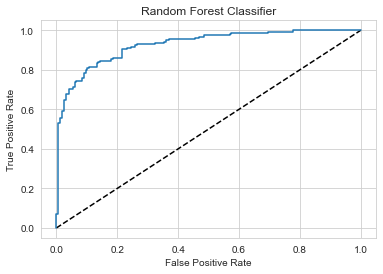

In [93]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [94]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))

In [95]:
auc_score

0.8510095194226932

# Saving the model

In [96]:
import joblib
joblib.dump(Final_model,'Titanic_RF.pkl')

['Titanic_RF.pkl']

<AxesSubplot:>

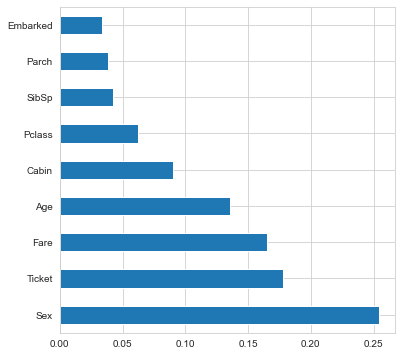

In [101]:
feat_importances = pd.Series(Final_model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(6,6))

According to our final model, We can see that the highest determinant of Survived is Sex, followed by Ticket and Fare and then Age.